<a href="https://colab.research.google.com/github/Nuelky/FE/blob/main/P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fredapi

In [ ]:
pip install matplotlib

In [ ]:
pip install yfinance

In [ ]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

# API key
fred = Fred(api_key='fcff9247972ea0909316db0bd50f38c2')

# **Scenario 1**

Have extracted proxy data needed from yfinance library for interest rates and default rates and plotted the rates over time


In [ ]:
# Fetching US Treasury Yield (10-year) as a proxy for interest rates
interest_rate_data = yf.download("^TNX", start="2000-01-01", end="2023-12-31")

# Fetching S&P 500 index data as a proxy for market conditions impacting default rates
default_rate_data = yf.download("^GSPC", start="2000-01-01", end="2023-12-31")

# Here, we will use a sample generated data for unemployment rates
unemployment_rate_data = pd.Series([4.5, 5.0, 6.0, 7.5, 8.0, 9.0, 9.5, 8.5, 7.0, 6.5, 6.0, 5.5, 5.0, 4.5],
                                   index=pd.date_range(start='2000-01-01', periods=14, freq='A-DEC'))

# Create DataFrame
data = pd.DataFrame({
    'Interest_Rates': interest_rate_data['Close'],
    'Default_Rates': default_rate_data['Close'],
    'Unemployment_Rates': unemployment_rate_data
}).dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


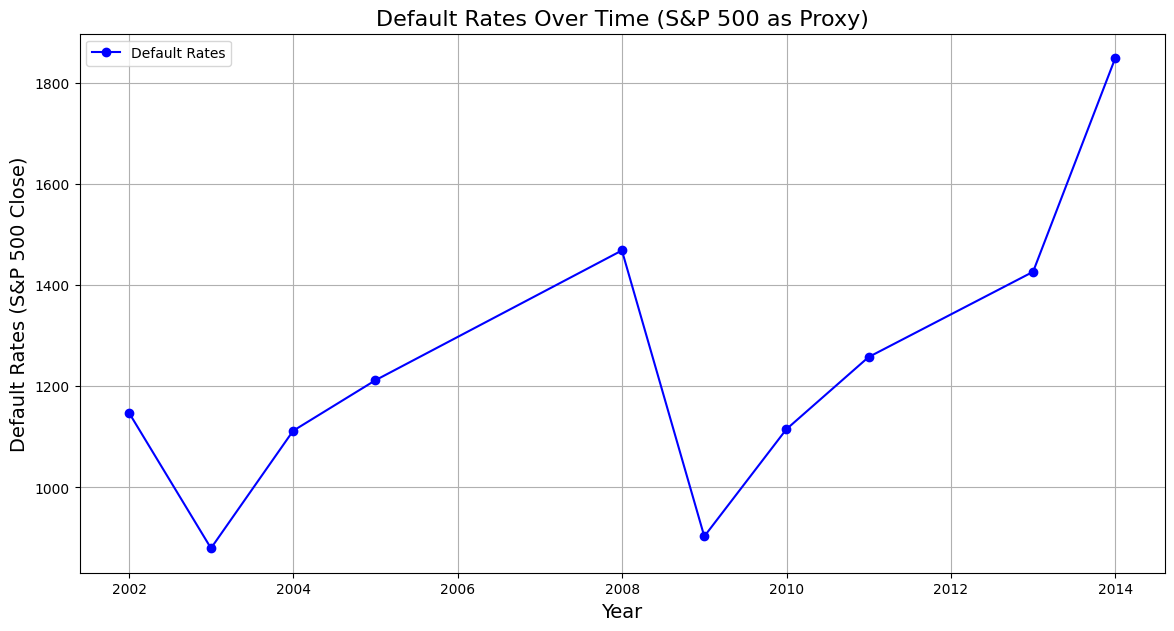

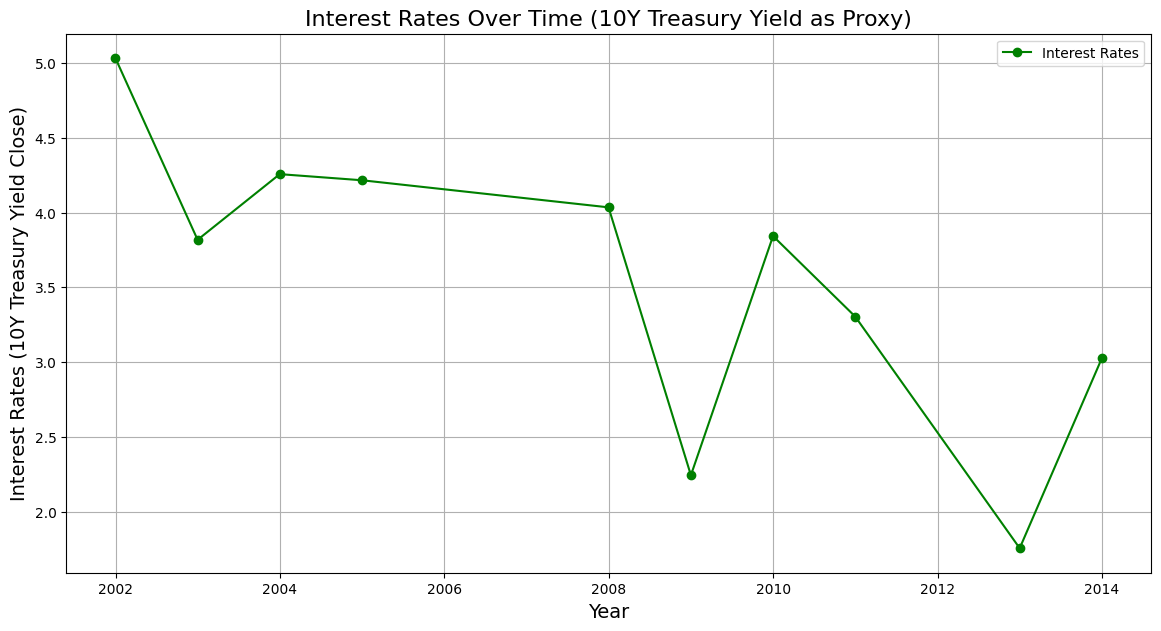

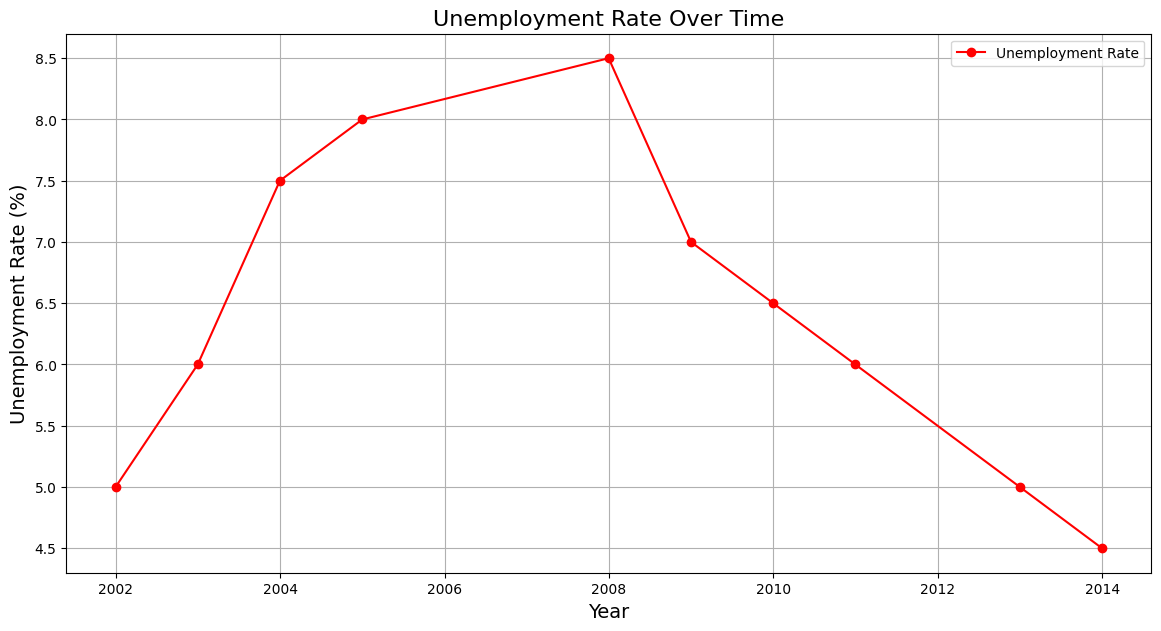

In [ ]:
# Plot default rates over time
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Default_Rates'], marker='o', label='Default Rates', color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Default Rates (S&P 500 Close)', fontsize=14)
plt.title('Default Rates Over Time (S&P 500 as Proxy)', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

# Plot interest rates over time
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Interest_Rates'], marker='o', label='Interest Rates', color='green')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Interest Rates (10Y Treasury Yield Close)', fontsize=14)
plt.title('Interest Rates Over Time (10Y Treasury Yield as Proxy)', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

# Plot unemployment rate over time
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Unemployment_Rates'], marker='o', label='Unemployment Rate', color='red')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Unemployment Rate (%)', fontsize=14)
plt.title('Unemployment Rate Over Time', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

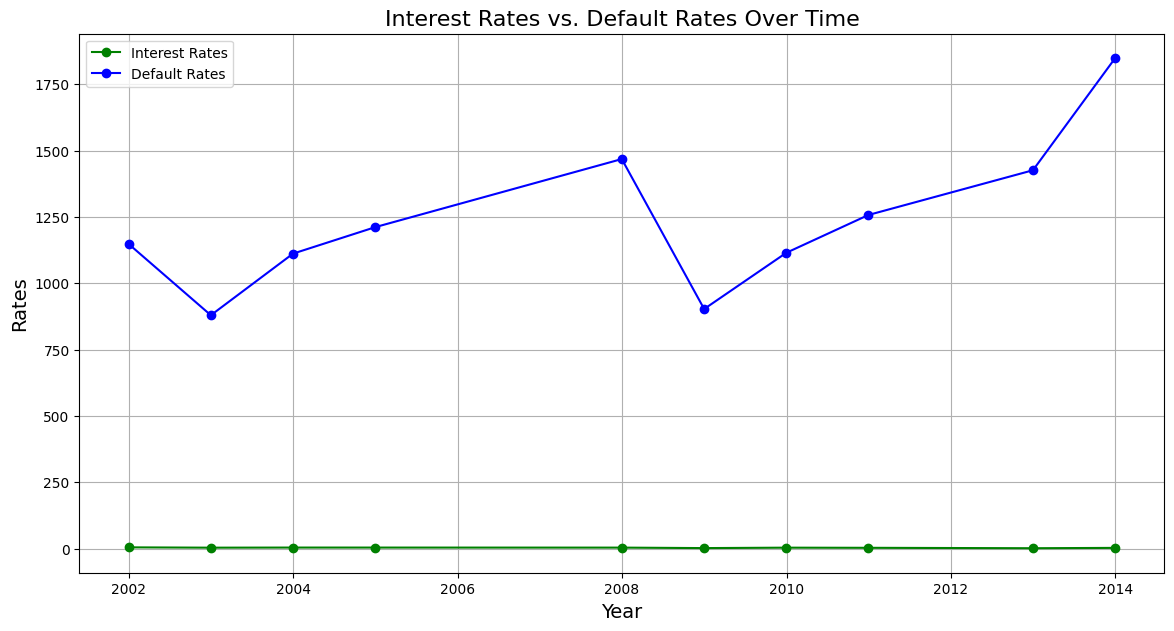

In [ ]:
# Combine Interest Rates and Default Rates into a single DataFrame for better comparison
data_combined = data[['Interest_Rates', 'Default_Rates']].dropna()

# Plot interest rates vs. default rates using a line plot
plt.figure(figsize=(14, 7))
plt.plot(data_combined.index, data_combined['Interest_Rates'], marker='o', label='Interest Rates', color='green')
plt.plot(data_combined.index, data_combined['Default_Rates'], marker='o', label='Default Rates', color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rates', fontsize=14)
plt.title('Interest Rates vs. Default Rates Over Time', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()


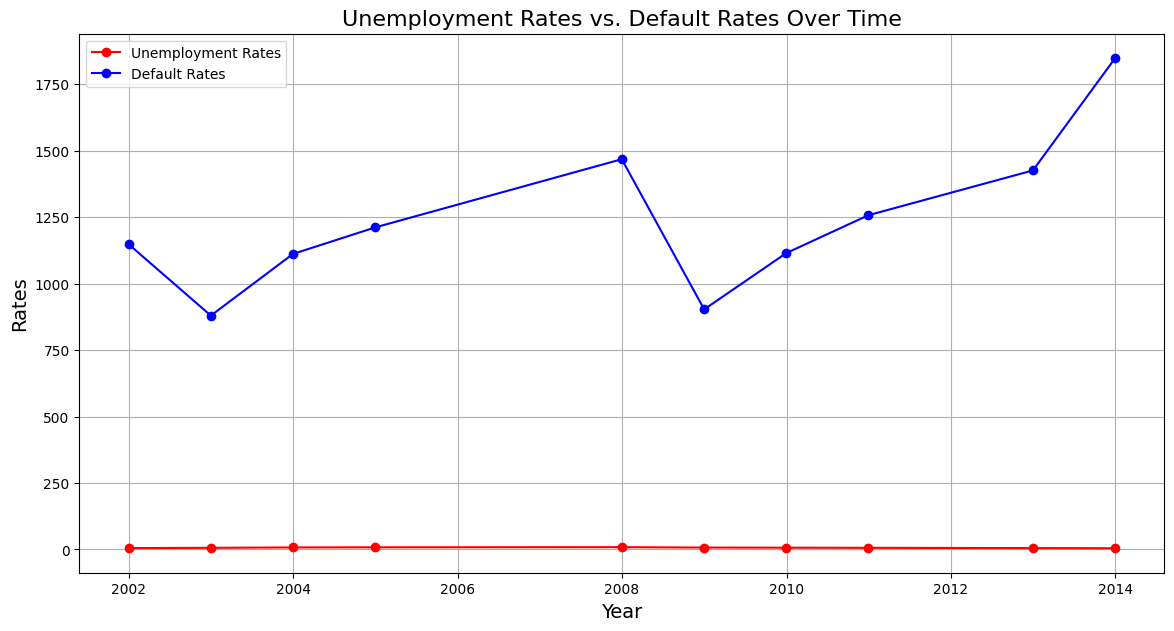

In [ ]:
# Combine Unemployment Rates and Default Rates into a single DataFrame for better comparison
data_combined_unemp = data[['Unemployment_Rates', 'Default_Rates']].dropna()

# Plot unemployment rate vs. default rates using a line plot
plt.figure(figsize=(14, 7))
plt.plot(data_combined_unemp.index, data_combined_unemp['Unemployment_Rates'], marker='o', label='Unemployment Rates', color='red')
plt.plot(data_combined_unemp.index, data_combined_unemp['Default_Rates'], marker='o', label='Default Rates', color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rates', fontsize=14)
plt.title('Unemployment Rates vs. Default Rates Over Time', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

*   The S&P 500 closing prices, which indicate default rates, exhibit notable variations throughout time. S&P 500 index peaks are associated with times of economic expansion and stability, while troughs are associated with times of economic contraction and heightened market turbulence.
*   Over time, the yield on the 10-year Treasury has decreased, which is consistent with the general decline in interest rates. Periodic increases can be seen when the Federal Reserve modifies its policies or when the economy is uncertain.

*   The unemployment rate graph illustrates times during economic downturns, such the financial crisis of 2008 and the COVID-19 pandemic of 2020, when jobless rates were very high. Economic expansions are associated with lower unemployment rates.





# **Scenario 2: Money at a Floating Rate for a Secured Purchase**

**Data Type:** Mortgage interest rates, housing market indicator

In [ ]:
# Extract data from FRED
mortgage_interest_rates = fred.get_series('MORTGAGE30US')
housing_market_indicators = fred.get_series('HSN1F')

# Create DataFrame
data_secured = pd.DataFrame({
    'Mortgage_Interest_Rates': mortgage_interest_rates,
    'Housing_Market_Indicators': housing_market_indicators
})

# Drop NaN values
data_secured.dropna(inplace=True)

# Save to CSV
data_secured.to_csv('secured_purchase_data.csv', index=True)


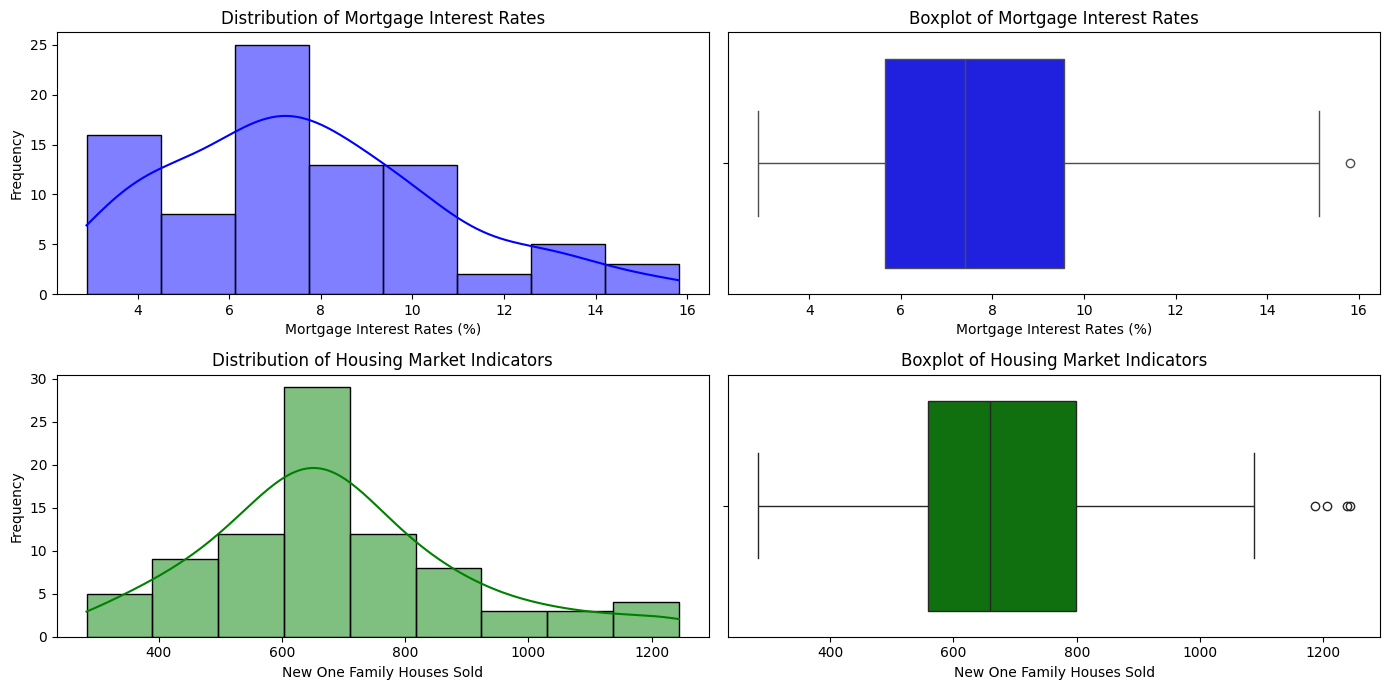

In [ ]:

# Plot distribution of Mortgage Interest Rates
plt.figure(figsize=(14, 7))
plt.subplot(2, 2, 1)
sns.histplot(data_secured['Mortgage_Interest_Rates'], kde=True, color='blue')
plt.title('Distribution of Mortgage Interest Rates')
plt.xlabel('Mortgage Interest Rates (%)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.boxplot(x=data_secured['Mortgage_Interest_Rates'], color='blue')
plt.title('Boxplot of Mortgage Interest Rates')
plt.xlabel('Mortgage Interest Rates (%)')

# Plot distribution of Housing Market Indicators
plt.subplot(2, 2, 3)
sns.histplot(data_secured['Housing_Market_Indicators'], kde=True, color='green')
plt.title('Distribution of Housing Market Indicators')
plt.xlabel('New One Family Houses Sold')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.boxplot(x=data_secured['Housing_Market_Indicators'], color='green')
plt.title('Boxplot of Housing Market Indicators')
plt.xlabel('New One Family Houses Sold')

plt.tight_layout()
plt.show()

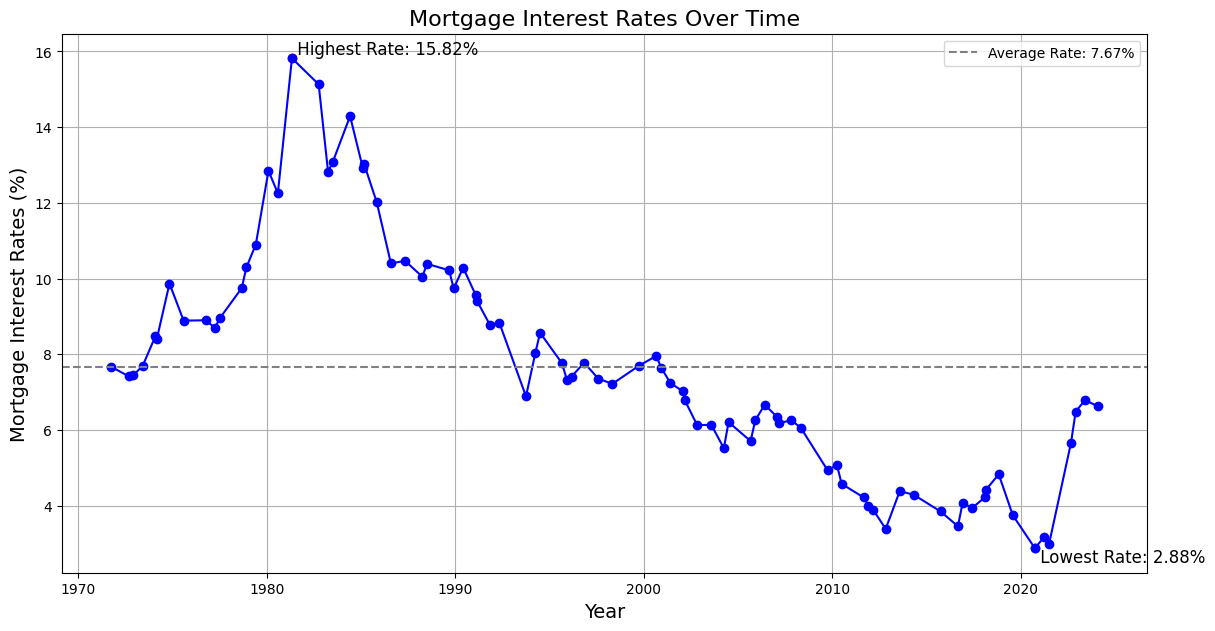

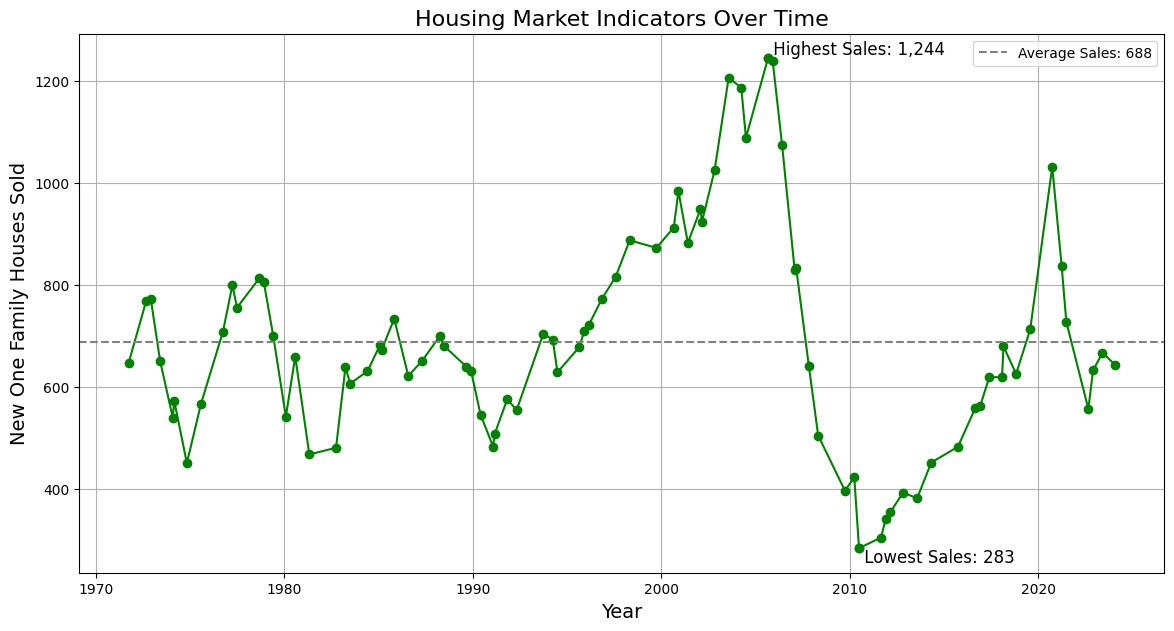

In [ ]:


# Load the data
data_secured = pd.read_csv('secured_purchase_data.csv', index_col=0, parse_dates=True)

# Plot mortgage interest rates over time
plt.figure(figsize=(14, 7))
plt.plot(data_secured.index, data_secured['Mortgage_Interest_Rates'], marker='o', color='blue', linestyle='-')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mortgage Interest Rates (%)', fontsize=14)
plt.title('Mortgage Interest Rates Over Time', fontsize=16)
plt.grid(True)

# Highlight significant points
max_rate = data_secured['Mortgage_Interest_Rates'].max()
min_rate = data_secured['Mortgage_Interest_Rates'].min()
avg_rate = data_secured['Mortgage_Interest_Rates'].mean()

plt.axhline(y=avg_rate, color='gray', linestyle='--', label=f'Average Rate: {avg_rate:.2f}%')
plt.scatter(data_secured['Mortgage_Interest_Rates'].idxmax(), max_rate, color='red')
plt.scatter(data_secured['Mortgage_Interest_Rates'].idxmin(), min_rate, color='green')
plt.text(data_secured['Mortgage_Interest_Rates'].idxmax(), max_rate, f' Highest Rate: {max_rate:.2f}%', fontsize=12, verticalalignment='bottom')
plt.text(data_secured['Mortgage_Interest_Rates'].idxmin(), min_rate, f' Lowest Rate: {min_rate:.2f}%', fontsize=12, verticalalignment='top')

plt.legend()
plt.show()

# Plot housing market indicators over time
plt.figure(figsize=(14, 7))
plt.plot(data_secured.index, data_secured['Housing_Market_Indicators'], marker='o', color='green', linestyle='-')
plt.xlabel('Year', fontsize=14)
plt.ylabel('New One Family Houses Sold', fontsize=14)
plt.title('Housing Market Indicators Over Time', fontsize=16)
plt.grid(True)

# Highlight significant points
max_sales = data_secured['Housing_Market_Indicators'].max()
min_sales = data_secured['Housing_Market_Indicators'].min()
avg_sales = data_secured['Housing_Market_Indicators'].mean()

plt.axhline(y=avg_sales, color='gray', linestyle='--', label=f'Average Sales: {avg_sales:,.0f}')
plt.scatter(data_secured['Housing_Market_Indicators'].idxmax(), max_sales, color='red')
plt.scatter(data_secured['Housing_Market_Indicators'].idxmin(), min_sales, color='green')
plt.text(data_secured['Housing_Market_Indicators'].idxmax(), max_sales, f' Highest Sales: {max_sales:,.0f}', fontsize=12, verticalalignment='bottom')
plt.text(data_secured['Housing_Market_Indicators'].idxmin(), min_sales, f' Lowest Sales: {min_sales:,.0f}', fontsize=12, verticalalignment='top')

plt.legend()
plt.show()



Lenders can evaluate the risk associated with secured loans by having a better understanding of how changes in mortgage interest rates affect default rates and housing market performance. Understanding the stability of the collateral is possible through the analysis of home market data.

Insight:


*   In the early 1980s, 15.82% was the highest mortgage interest rate that was recorded. This peak coincides with the time when the Federal Reserve implemented strict monetary policy to battle the state of the economy and high levels of inflation.
*   In the years 2020–2021, 2.88% was the lowest mortgage interest rate that was recorded. This time frame is consistent with the Federal Reserve's efforts to use low interest rates to boost the economy during the COVID-19 epidemic.





#SCENARIO 5

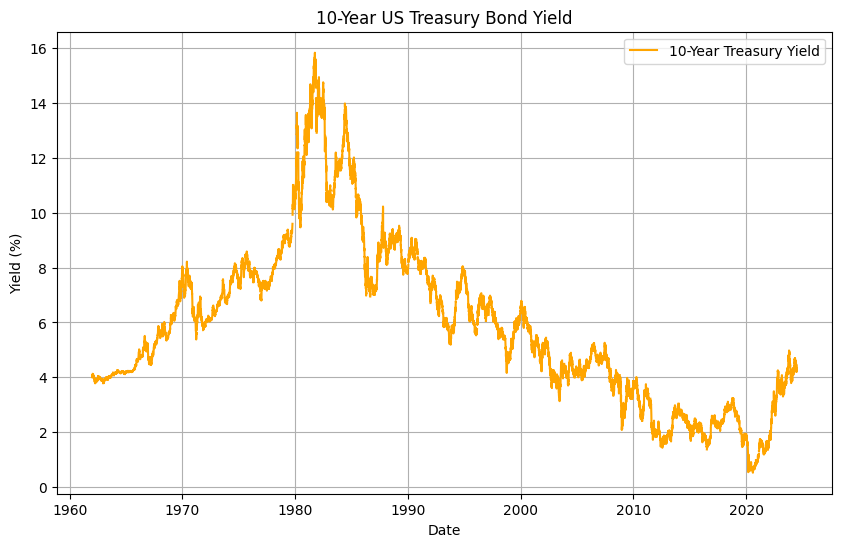

In [ ]:

# Fetch the 10-year US Treasury bond data
ten_year_bond_data = fred.get_series('DGS10')

# Convert to DataFrame
ten_year_bond_df = pd.DataFrame(ten_year_bond_data, columns=['10-Year Treasury Yield'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(ten_year_bond_df.index, ten_year_bond_df['10-Year Treasury Yield'], label='10-Year Treasury Yield', color='orange')

# title and labels
plt.title('10-Year US Treasury Bond Yield')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.legend()

# Show grid ()
plt.grid(True)

# Display plot
plt.show()



#Scenario 6

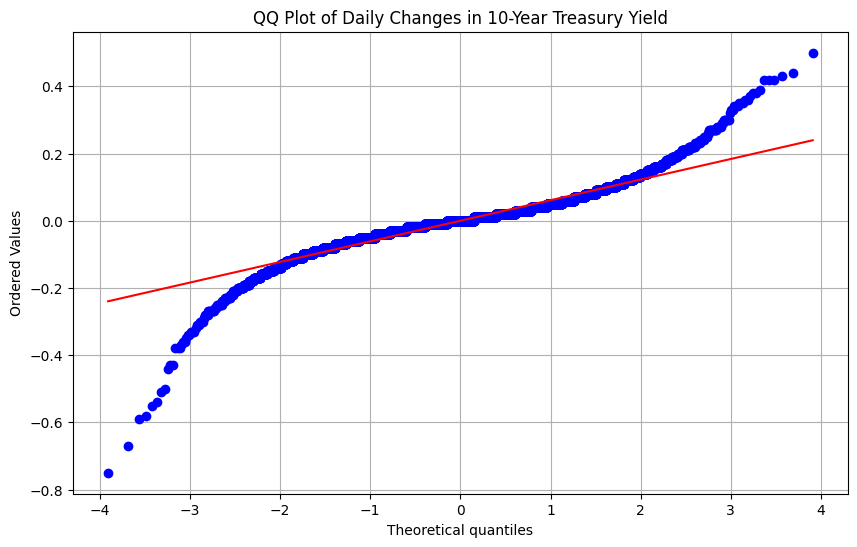

In [ ]:

import scipy.stats as stats

# Calculate daily changes in yield
ten_year_bond_df['Daily Change'] = ten_year_bond_df['10-Year Treasury Yield'].diff().dropna()

# Drop NA values that resulted from diff()
ten_year_bond_df = ten_year_bond_df.dropna(subset=['Daily Change'])

# Generate QQ plot
plt.figure(figsize=(10, 6))
stats.probplot(ten_year_bond_df['Daily Change'], dist="norm", plot=plt)
plt.title('QQ Plot of Daily Changes in 10-Year Treasury Yield')
plt.grid(True)
plt.show()


The QQ plot of the daily changes in the 10-year US Treasury yield reveals significant deviations from normality. The points deviate markedly from the red reference line, especially in the tails, indicating that the distribution of daily changes does not follow a normal distribution. The pronounced curvature in the lower left and upper right corners suggests the presence of heavy tails, implying that extreme changes in the yield are more frequent than would be expected under a normal distribution. Also, the asymmetry observed in the plot indicates potential skewness in the distribution, with a tendency towards more negative changes

                           Open       High   Low  Close  Volume  Dividends  \
Date                                                                         
2014-06-30 00:00:00-04:00  41.5  43.500000  40.5   40.5    2538        0.0   
2014-07-01 00:00:00-04:00  42.0  42.000000  40.0   41.0    1630        0.0   
2014-07-02 00:00:00-04:00  41.5  41.500000  38.0   39.0    7992        0.0   
2014-07-03 00:00:00-04:00  39.0  39.900002  38.0   39.5    4050        0.0   
2014-07-07 00:00:00-04:00  38.5  40.000000  36.0   36.5    4464        0.0   

                           Stock Splits  
Date                                     
2014-06-30 00:00:00-04:00           0.0  
2014-07-01 00:00:00-04:00           0.0  
2014-07-02 00:00:00-04:00           0.0  
2014-07-03 00:00:00-04:00           0.0  
2014-07-07 00:00:00-04:00           0.0  


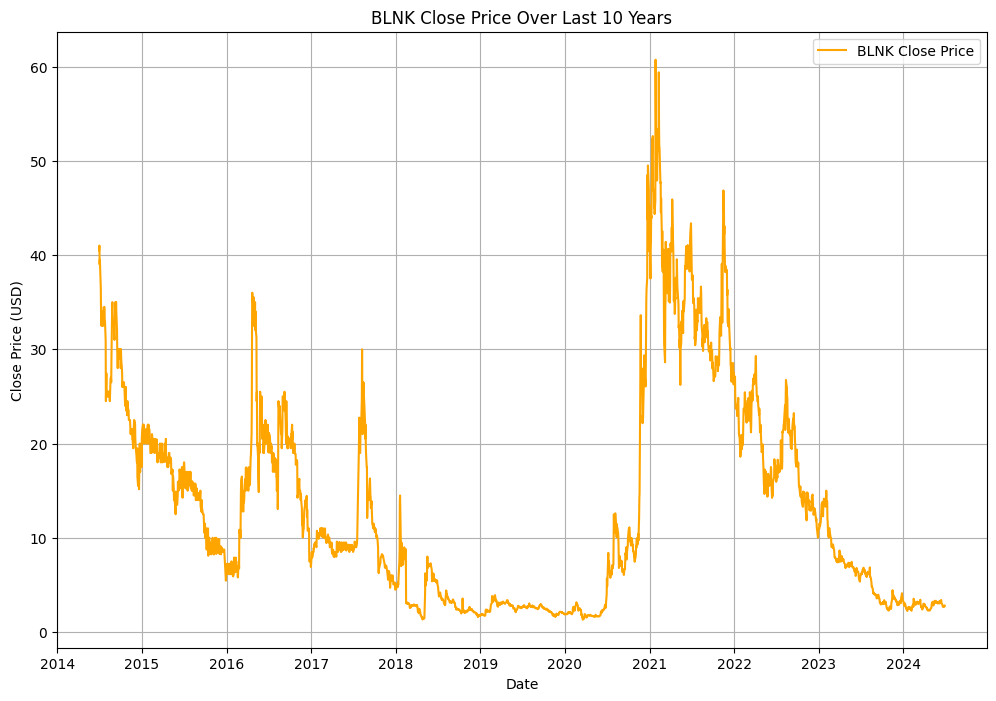

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# symbol for the microcap stock
symbol = 'BLNK'

# Fetch for the last 10 years
stock_data = yf.Ticker(symbol)
df = stock_data.history(period='10y')

# Display the first few rows
print(df.head())

# Plot the data
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Close'], label=f'{symbol} Close Price', color='orange')
plt.title(f'{symbol} Close Price Over Last 10 Years')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

                           Open       High   Low  Close  Volume  Dividends  \
Date                                                                         
2014-07-01 00:00:00-04:00  42.0  42.000000  40.0   41.0    1630        0.0   
2014-07-02 00:00:00-04:00  41.5  41.500000  38.0   39.0    7992        0.0   
2014-07-03 00:00:00-04:00  39.0  39.900002  38.0   39.5    4050        0.0   
2014-07-07 00:00:00-04:00  38.5  40.000000  36.0   36.5    4464        0.0   
2014-07-08 00:00:00-04:00  38.0  39.000000  33.5   34.0    5824        0.0   

                           Stock Splits  Daily Return  
Date                                                   
2014-07-01 00:00:00-04:00           0.0      0.012346  
2014-07-02 00:00:00-04:00           0.0     -0.048780  
2014-07-03 00:00:00-04:00           0.0      0.012821  
2014-07-07 00:00:00-04:00           0.0     -0.075949  
2014-07-08 00:00:00-04:00           0.0     -0.068493  


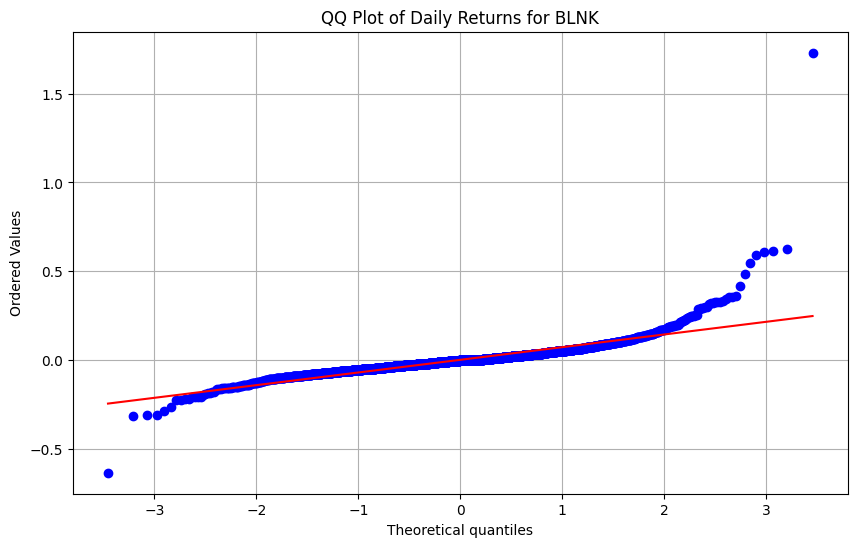

In [ ]:

import scipy.stats as stats


# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()

# Remove NaN values that result from the pct_change() calculation
df = df.dropna(subset=['Daily Return'])

# first few rows of the data
print(df.head())

# Generate QQ plot
plt.figure(figsize=(10, 6))
stats.probplot(df['Daily Return'], dist="norm", plot=plt)
plt.title('QQ Plot of Daily Returns for BLNK')
plt.grid(True)
plt.show()


QQ plot of the daily returns for BLNK indicates significant deviations from normality. The heavy tails are evident from the points diverging from the red reference line at both extremes, suggesting more frequent extreme values than a normal distribution would predict. Also, the curvature in the upper right corner reveals a positive skew, indicating more extreme positive returns. The presence of outliers is shown by a few points lying far from the reference line